# Demonstration Descente du Gradient

## Opérateur logique ET (table 2.3)

      inputs  label
0  [1, 0, 0]     -1
1  [1, 0, 1]     -1
2  [1, 1, 0]     -1
3  [1, 1, 1]      1
0.5
0.38
0.3176
0.272096
0.23746687999999996
0.2109994496
0.19076144537599998
0.17528604581888
0.16345241923420156
0.15440355591756186
0.14748412762286195
0.14219302238235246
0.13814705305009922
0.13505320647285984
0.13268742318151655
0.13087837077963715
0.12949503587963987
0.1284372359819904
0.12762836415820467
0.12700984110032926
0.12653687274876402
0.1261752062615828
0.12589864938940076
0.12568717360642945
0.12552546362457123
0.12540180824490954
0.12530725222094868
0.1252349477106901
0.12517965834905306
0.1251373800250688
0.12510505090015234
0.125080329666684
0.12506142598816578
0.12504697084125826
0.1250359173697386
0.12502746507012394
0.12502100181840714
0.1250160595394229
0.12501228030837497
0.12500939042956422
0.12500718061507154
0.12500549082791718
0.1250041986920223
0.12500321062961073
0.12500245508421254
0.12500187733847296
0.12500143555146662
0.12500109772853593
0.125000839404

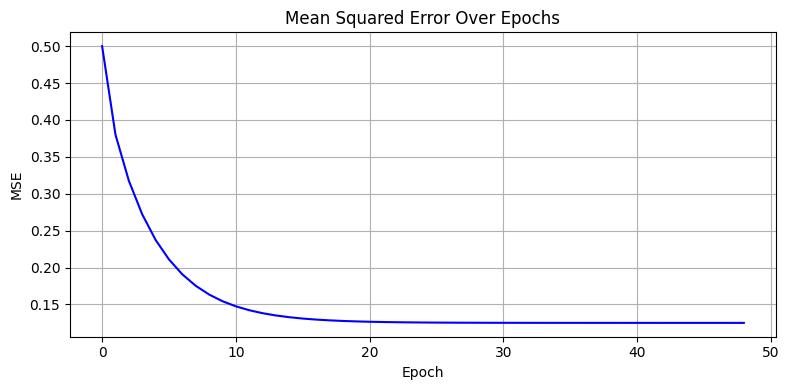

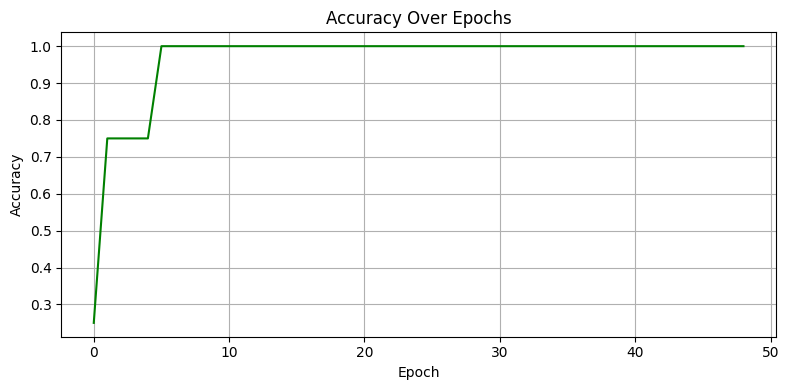

In [1]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.2, epochs=1000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_3.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0.125001, mode="classification")

print(f"\nRésultats après entrainement:")
for _, row in df.iterrows():
    print(f"{row["inputs"][1:]} : {perceptron_gradient.activation_function(perceptron_gradient.predict(df))[_]}")

df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

## Classification de données linéaires séparables (table 2.9)

        inputs  label
0    [1, 1, 6]      1
1    [1, 7, 9]     -1
2    [1, 1, 9]      1
3   [1, 7, 10]     -1
4    [1, 2, 5]     -1
5    [1, 2, 7]      1
6    [1, 2, 8]      1
7    [1, 6, 8]     -1
8    [1, 6, 9]     -1
9    [1, 3, 5]     -1
10   [1, 3, 6]     -1
11   [1, 3, 8]      1
12   [1, 3, 9]      1
13   [1, 5, 7]     -1
14   [1, 5, 8]     -1
15  [1, 5, 10]      1
16  [1, 5, 11]      1
17   [1, 4, 6]     -1
18   [1, 4, 7]     -1
19   [1, 4, 9]      1
20  [1, 4, 10]      1
0.5
0.4733265557142857
0.4488833395149138
0.4264824966985647
0.4059520102232411
0.3871343637918911
0.3698853180238296
0.35407279011536164
0.33957582821026805
0.32628367244952494
0.3140948953539229
0.3029166148187913
0.29266377357188095
0.28325847946832167
0.27462940147465753
0.26671121663118036
0.25944410368163096
0.2527732794250702
0.24664857417925026
0.24102404305084596
0.23585760998787342
0.2311107418457641
0.22674814993292763
0.22273751671608194
0.21904924556185904
0.21565623157077554
0.2125336517239899
0.2

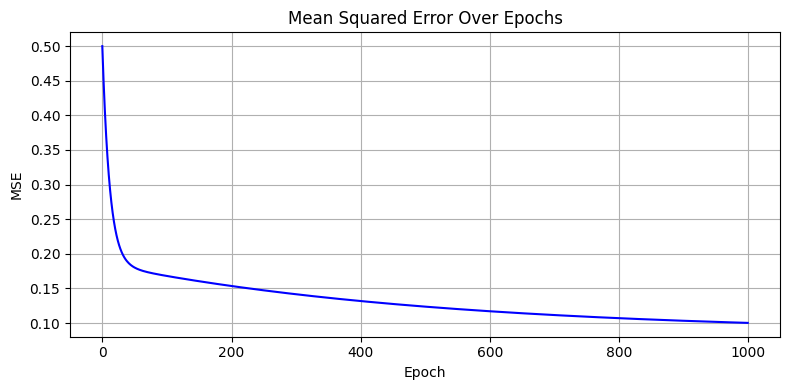

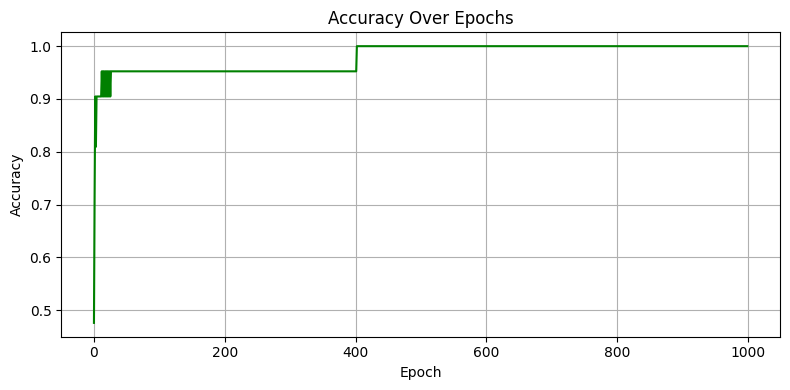

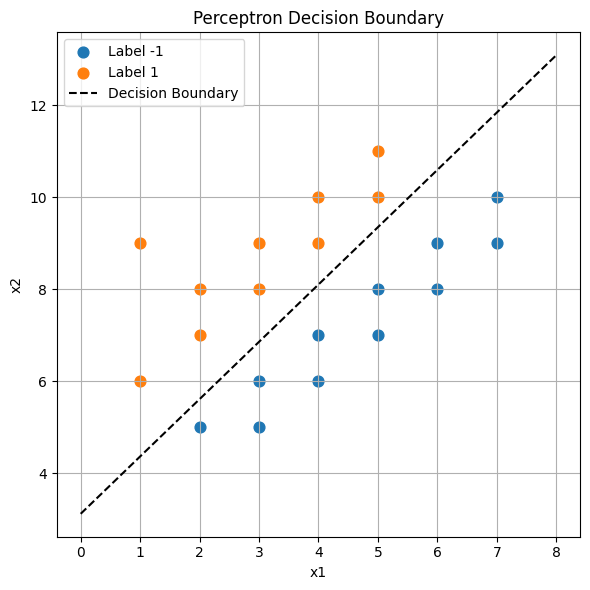

In [2]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.0011, epochs=1000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_9.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0, mode="classification")

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

final_weights = perceptron_gradient.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 8, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Classification de données non linéairement séparables (table 2.10)

       inputs  label
0   [1, 1, 2]      1
1   [1, 1, 4]     -1
2   [1, 1, 5]      1
3   [1, 7, 5]     -1
4   [1, 7, 6]     -1
5   [1, 2, 1]     -1
6   [1, 2, 3]      1
7   [1, 2, 4]      1
8   [1, 6, 2]      1
9   [1, 6, 4]     -1
10  [1, 6, 5]     -1
11  [1, 3, 1]     -1
12  [1, 3, 2]     -1
13  [1, 3, 4]      1
14  [1, 3, 5]      1
15  [1, 5, 3]     -1
16  [1, 5, 4]     -1
17  [1, 5, 6]      1
18  [1, 5, 7]      1
19  [1, 4, 2]     -1
20  [1, 4, 3]      1
21  [1, 4, 5]      1
22  [1, 4, 6]      1
0.5
0.4812924076086958
0.46534837342633567
0.4514539704143053
0.4393323512794895
0.42875673753456534
0.41952990607872015
0.4114798168775747
0.4044563751149138
0.39832863093629717
0.3929823374205027
0.38831782008180604
0.38424811812383436
0.3806973627806492
0.37759936250398957
0.37489636861298914
0.3725379983879801
0.37048029552604733
0.36868491043753976
0.36711838509755923
0.3657515291162133
0.364558875392476
0.3635182052005936
0.36261013385276086
0.3618177492114335
0.3611262963101868
0.3605

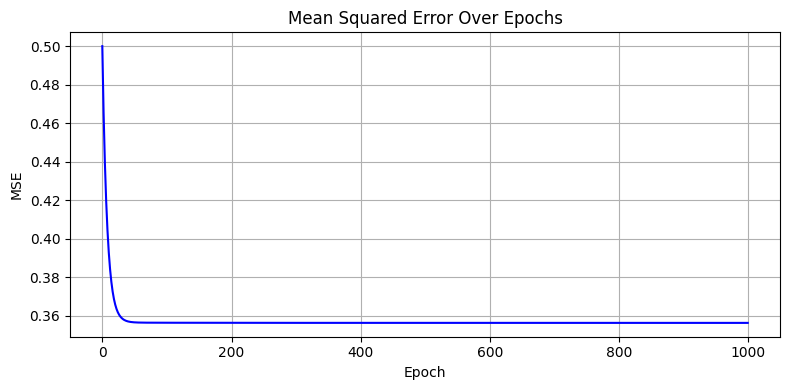

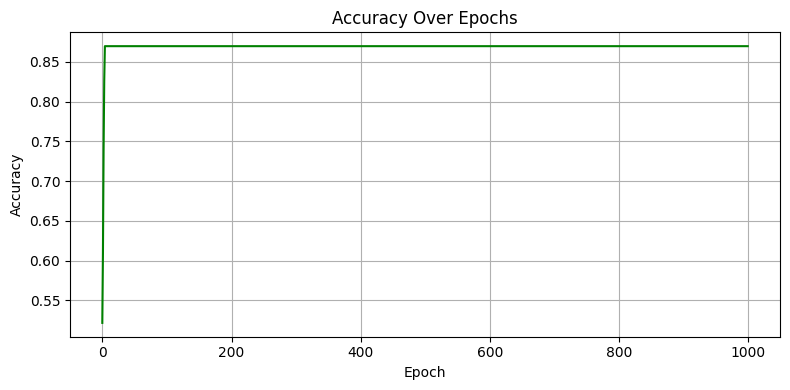

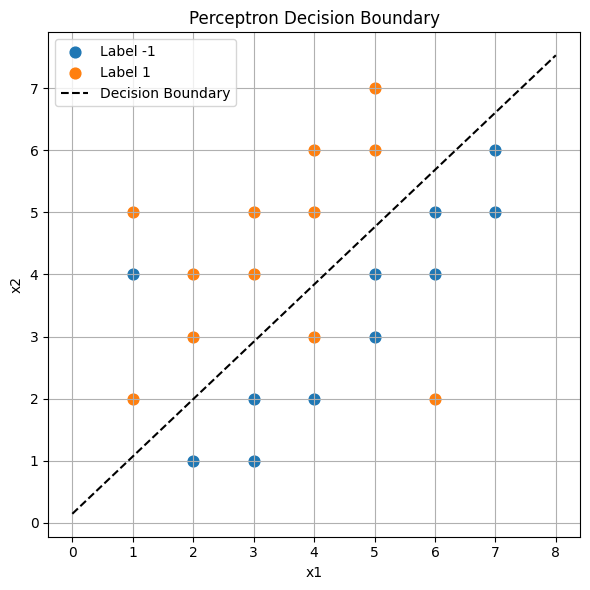

In [2]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.0015, epochs=1000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_10.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=20.209288, mode="classification")

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

final_weights = perceptron_gradient.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 8, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Malgré un Graphique ressemblant au résultat de Mr. l'erreur quadratique moyenne quant à elle n'est pas dutout la même (16,388103 pour Mr et 0.171271 pour moi)

## Régression linéaire (table 2.11)

     inputs  label
0   [1, 10]    4.4
1   [1, 14]    5.6
2   [1, 12]    4.6
3   [1, 18]    6.1
4   [1, 16]    6.0
5   [1, 14]    7.0
6   [1, 22]    6.8
7   [1, 28]   10.6
8   [1, 26]   11.0
9   [1, 16]    7.6
10  [1, 23]   10.8
11  [1, 25]   10.0
12  [1, 20]    6.5
13  [1, 20]    8.2
14  [1, 24]    8.8
15  [1, 12]    5.5
16  [1, 15]    5.0
17  [1, 18]    8.0
18  [1, 14]    7.8
19  [1, 26]    9.0
20  [1, 25]    9.4
21  [1, 17]    8.5
22  [1, 12]    6.4
23  [1, 20]    7.5
24  [1, 23]    9.0
25  [1, 22]    8.1
26  [1, 26]    8.2
27  [1, 22]   10.0
28  [1, 18]    9.1
29  [1, 21]    9.0
32.19316666666666
31.764184182415885
31.341039209002805
30.92365229756094
30.5119450805356
30.10584025696713
29.705261577974298
29.31013383243548
28.920382832864348
28.53593540147833
28.15671935645604
27.78266349838228
27.4136975968774
27.049752377408307
26.690759508279534
26.336651587800755
25.987362131629563
25.642825560286
25.302977186837307
24.967753204750228
24.63709067590862
24.310927518794095
23.98920

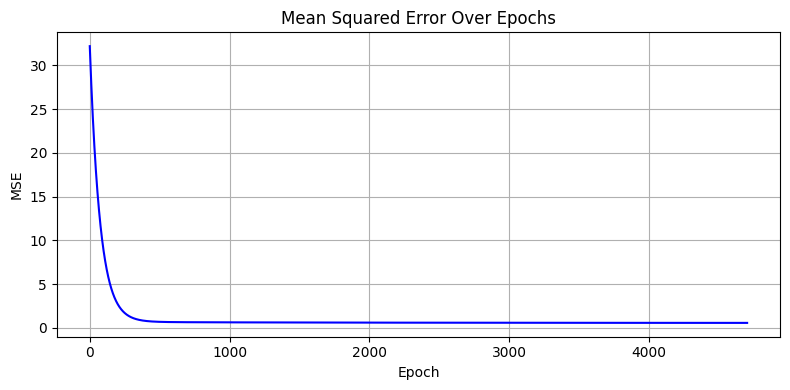

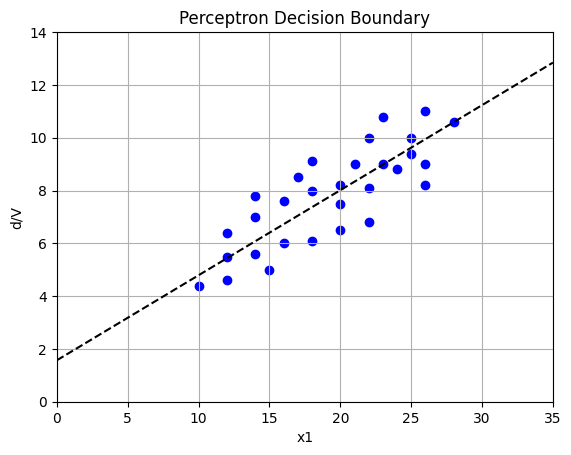

In [1]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.000167, epochs=10000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_11.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0.56, mode="regression")

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

weights = perceptron_gradient.weights
bias = weights[0]
w1 = weights[1]
x_vals = np.array([val[1] for val in df["inputs"]])
x_vals = np.linspace(0, 35, 100)
y_line = bias + w1 * x_vals

x = [item[1] for item in df['inputs']]
y = df['label']

# Création du graphique
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_vals, y_line, 'k--', label="Decision Boundary")

# Ajout d'un titre et des labels
plt.title("Perceptron Decision Boundary")
plt.xlabel("x1")
plt.ylabel("d/V")
plt.xlim(0, 35)
plt.ylim(0, 14)

plt.grid(True)

plt.show()
